# Exercise 12 Solution
In order to generate the data that is used in this notebook, set the compiler in the Makefile correctly, then issue 'make all'.

This kind of data is most easily visualized in form of an animation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

First, we need to make sure the size of the balls is correct (radius 1)

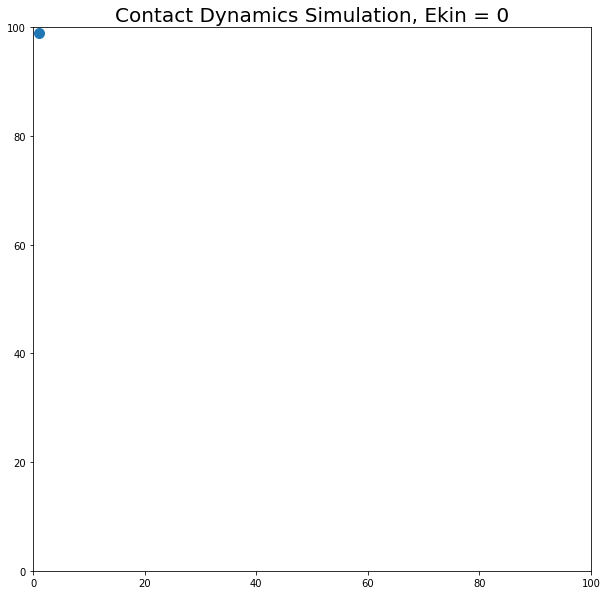

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_title(f"Contact Dynamics Simulation, Ekin = {int(0.)}", fontsize=20)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
scat = ax.scatter([1],[99], s=100);

Now we animate the data as a scatter plot with the colour of a particle corresponding to its speed.

In [3]:
data = np.loadtxt("data.txt")
xs = data[0][::2]
ys = data[0][1::2]

def init():
    scat.set_offsets([])
    ax.set_title(f"Contact Dynamics Simulation, Ekin = {int(0)}", fontsize=20)
    return (scat,)

def animate(i):
    xs = data[i][1::3]
    ys = data[i][2::3]
    cs = data[i][3::3]
    points = [[xs[j],ys[j]] for j in range(len(xs))]
    scat.set_offsets(points)
    scat.set_array(cs)
    ax.set_title(f"Contact Dynamics Simulation, Ekin = {int(data[i][0])}", fontsize=20)
    return (scat,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data), interval=20, 
                               blit=False)

In [4]:
HTML(anim.to_html5_video())

# Comments
- The shock law used here describes completely inelastic collisions (restitution coefficient 0). That's why we observe a declining kinetic energy, even without the presence of friction.
- Only two-particle collisions are handled. In the given configuration this is not an issue, but it will become one if we apply certain changes (e.g. raise the density or turn on gravity).
- Collisions with walls are completely elastic.